In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
batch_size = 128
num_classes = 10
epochs = 20

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
import matplotlib.pyplot as plt

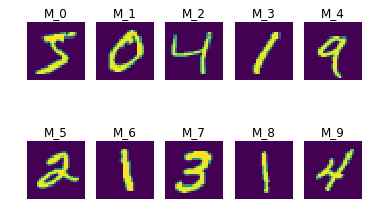

In [9]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("M_%d" % i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)

plt.show()

In [10]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [12]:
model = Sequential()
model.add(layers.Dense(512, input_shape=(784, )))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [13]:
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('mnist_training.log')
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1, callbacks=[es, csv_logger])


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 4s 71us/step - loss: 0.2646 - accuracy: 0.9179 - val_loss: 0.0984 - val_accuracy: 0.9723
Epoch 2/20
54000/54000 [==============================] - 4s 71us/step - loss: 0.1085 - accuracy: 0.9662 - val_loss: 0.0732 - val_accuracy: 0.9785
Epoch 3/20
54000/54000 [==============================] - 4s 74us/step - loss: 0.0775 - accuracy: 0.9766 - val_loss: 0.0879 - val_accuracy: 0.9757
Epoch 4/20
54000/54000 [==============================] - 4s 80us/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0669 - val_accuracy: 0.9818
Epoch 5/20
54000/54000 [==============================] - 4s 80us/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0655 - val_accuracy: 0.9823
Epoch 6/20
54000/54000 [==============================] - 5s 86us/step - loss: 0.0427 - accuracy: 0.9867 - val_loss: 0.0790 - val_accuracy: 0.9812
Epoch 7/20
54000/54000 [==============================] - 5s 90us/ste

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

test loss: 0.08231436519495496
test accuracy: 0.980400025844574


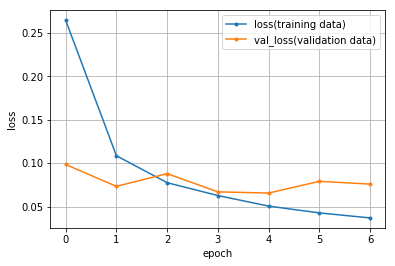

In [16]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(validation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()